# 第12回

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./boston/train.csv", index_col=0)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,,,,,,,,,,,,,,
328,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5,287.0,19.6,12.79,22.2,396.90
458,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666.0,20.2,16.94,13.5,3.50
6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,5.21,28.7,394.12
329,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4,430.0,16.9,9.97,19.3,382.44
61,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8,284.0,19.7,13.15,18.7,395.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8,307.0,17.4,11.65,24.3,378.35
244,0.12757,30.0,4.93,0.0,0.428,6.393,7.8,7.0355,6,300.0,16.6,5.19,23.7,374.71
214,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4,277.0,18.6,9.38,28.1,385.81


In [4]:
Y = df["MEDV"]
X = df.drop(["MEDV", "LSTAT"], axis=1)

In [42]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression

In [41]:
def test_model(model_cls, x, y, splitter=train_test_split):
    x_train, x_test, y_train, y_test = splitter(x, y)
    model = model_cls()
    model.fit(x_train, y_train)
    y_bar_test = model.predict(x_test)
    plt.figure(figsize=(5, 5))
    plt.scatter(y_bar_test, y_test)
    plt.xlabel("prediction")
    plt.ylabel("actual")
    plt.show()
    print(f"Score: {model.score(x_test, y_test)}")


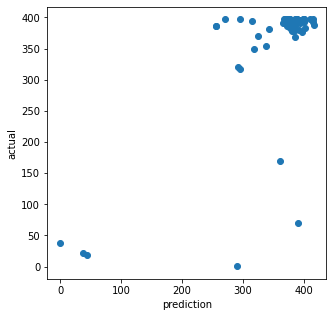

Score: 0.5176307177557224


In [50]:
test_model(LinearRegression, X, Y)

In [39]:
from sklearn.linear_model import Lasso

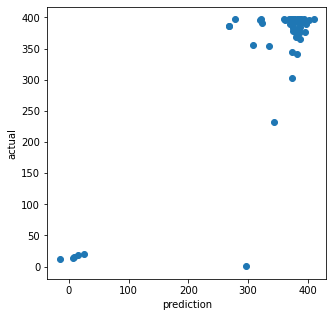

Score: 0.7698563925292551


In [51]:
test_model(Lasso, X, Y)

In [52]:
from sklearn.linear_model import Ridge

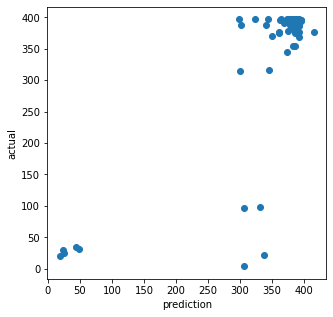

Score: 0.6500357455442427


In [54]:
test_model(Ridge, X, Y)

In [55]:
from sklearn.neighbors import KNeighborsRegressor

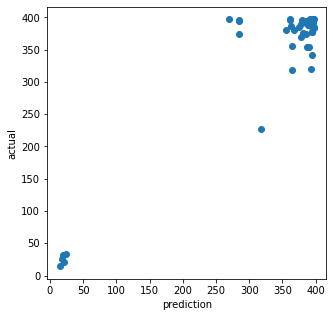

Score: 0.8770850399629179


In [59]:
test_model(lambda: KNeighborsRegressor(3), X, Y)

In [61]:
from sklearn.svm import SVR

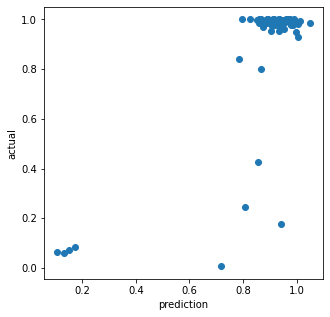

Score: 0.6214861881153406


In [80]:
test_model(lambda: SVR(kernel="rbf", C=100, gamma=0.1), X / X.max(), Y / Y.max())